# SVM (Support Vector Machines)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 (복잡한 분류문제)

- 서포트 벡터 머신을 분류와 회귀에 모두 사용할 수 있음 <br>
(선형, 비선형 분류, 회귀, 이상치 탐색에도 사용되는 다목적 머신러닝 모델)

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 10.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b4a4801e5950749011d4b5b29e9489a4f755254ee692a33468c99b08125eb6e6
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

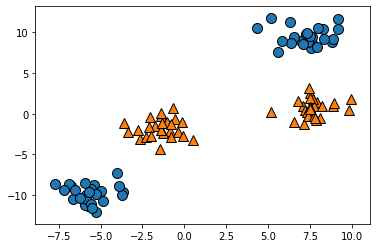

In [ ]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
X,y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)

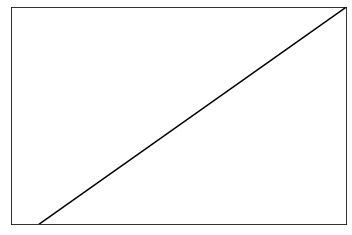

In [ ]:
# 선형 분류
from sklearn.svm import LinearSVC
model_lsvc= LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(model_lsvc,X)

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않음

선형 모델과 비선형 특징

- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적

- 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것

특성을 추가하여 입력 특성을 확장 (2차원 -> 3차원)

- 특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터 세트

- (특성0, 특성1) -> (특성0, 특성1, 특성 ** 2)
- 3차원 산점도로 표현

Matplotlib은 mpl_tookits라는 모듈로 3차원 그래프를 그릴 수 있다.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

X_new = np.hstack([X, X[:, 1:] ** 2])
X_new.shape


(100, 3)

SVM을 이용하여 분류

- 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분
- 확장한 3차원 데이터 세트에서 선형 SVM이 만든 결정 경계

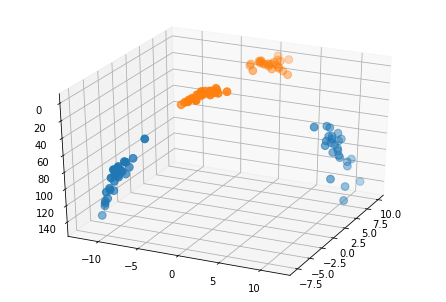

In [ ]:
# 분류 결과 시각화
figure = plt.figure()
ax = Axes3D(figure, elev=-150,azim=-25)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],s=60)


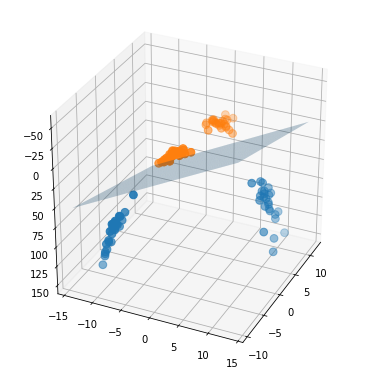

In [ ]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC
model_lsvc_3d = LinearSVC().fit(X_new,y)
coef,intercept = model_lsvc_3d.coef_.ravel(),model_lsvc_3d.intercept_
coef.shape, intercept.shape

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)

ZZ = -(coef[0]*XX +coef[1]*YY + intercept) / coef[2]

#3차원 그래프
figure = plt.figure(figsize=(5,5))
ax = Axes3D(figure, elev=-150,azim=-25)
ax.plot_surface(XX,YY,ZZ,alpha = .3)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],s=60)

In [ ]:
## 분류 결과 시각화
ZZ = YY ** 2
dec = model_lsvc_3d.decision_function(np.c_[XX.ravel(), YY.ravel(),ZZ.ravel()])
dec

array([ -7.52537958,  -7.47450266,  -7.42362574, ..., -10.04414855,
        -9.99327163,  -9.94239471])

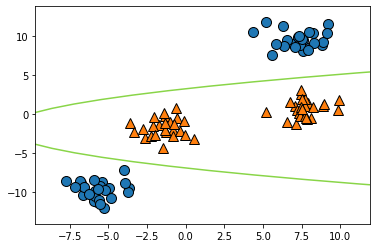

In [ ]:
plt.contour(XX,YY,dec.reshape(XX.shape),levels = [dec.min(), 0 ,dec.max()],slpha= .5)
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)

- 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님
- 직선보다 타원에 가까운 모습을 확인

## 커널 기법 (Kernel trick)

- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들 수 있음

- 하지만, 어떤 특성을 추가해야 할지 알 수 없고, 특성을 많이 추가하면 연산 비용이 커짐

- 커널 기법 : 새로운 특성을 만들지 않고 고차원 분류기를 학습시킬 수 있음 (데이터 포인트들의 거리를 계산 - 스칼라 곱)

- 고차원 공간 맵핑 방법 : 가우시안 커널, RBF (Radial Basis Function) 커널

- 주로 RBF 커널이 사용

## SVM

- Support Vector : 클래스 사이의 경계에 위치한 데이터 포인트

- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 -> SVC 객체의 dual_coef_ 속성에 저장

- 결정 경계는 데이터 군으로부터 최대한 멀리 떨어지는 게 좋다. 실제로 서포트 벡터 머신(Support Vector Machine)이라는 이름에서 Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다. 

- 마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.



array([[ 8.1062269 ,  4.28695977],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ],
       [10.24028948,  2.45544401],
       [ 7.99815287,  4.8525051 ]])

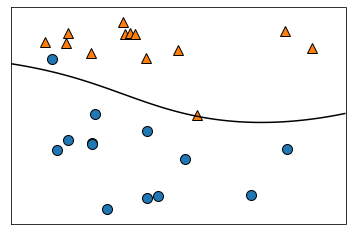

In [ ]:
#RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()

model_svm = SVC(kernel = 'rbf', C = 10 ,gamma=0.1).fit(X,y)

mglearn.plots.plot_2d_separator(model_svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

model_svm.support_vectors_

#### SVM의 튜닝 (C, gamma)

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당
 - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
 - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐
 - 결정경계를 얼마나 유연하게 그릴 것인가를 나타냄

- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
 - 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한
 - C는 오류를 얼마나 하용할 것인가를 나타냄
 - C값이 클수록 하드 마진이다. 따라서 자칫하면 오버피팅 문제가 발생할 수 있다.

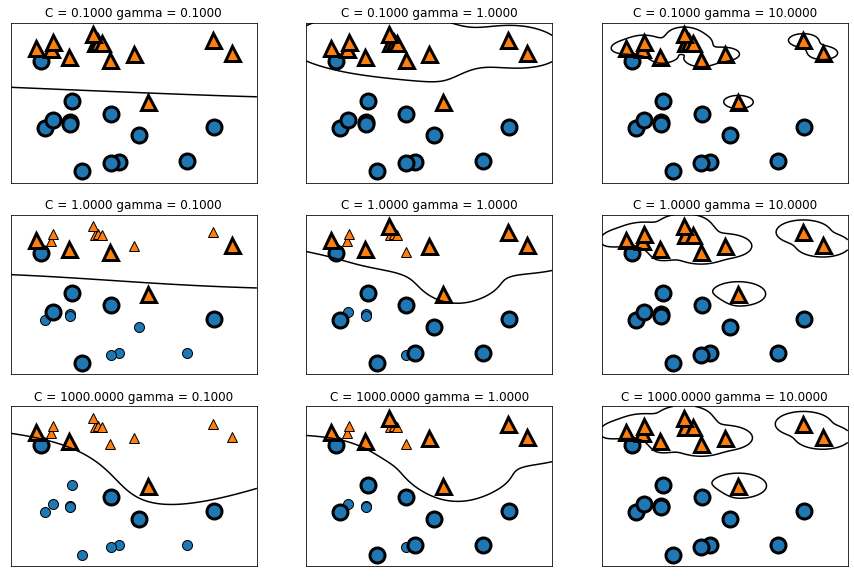

In [ ]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3,3,figsize =(15,10))

for ax , C in zip(axes,[-1,0,3]):
  for a, gamma in zip(ax,[-1,0,1]):
      mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify = cancer.target, 
                                                    random_state=0)

In [ ]:
model_svc = SVC(C=1).fit(X_train,y_train)
model_svc.score(X_train,y_train), model_svc.score(X_test,y_test)

(0.9225352112676056, 0.916083916083916)


- SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감

- 특히 입력 특성의 범위가 비슷해야 하므로 각 특성의 최솟값과 최댓값을 로그 스케일로 변환

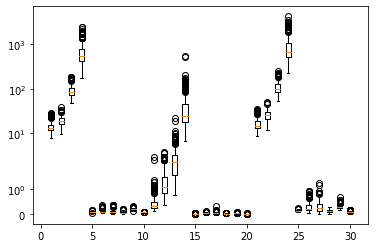

In [ ]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')

- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#훈련데이터에 대한 스케일링 초기화
scaler.fit(X_train)

#스케일링 적용
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0000000000000002)

##### 스케일링된 데이터를 SVC에 적용하기

In [ ]:
# gamma 파라미저 조정
model_svc = SVC(gamma=0.1).fit(X_train_scaled,y_train)

model_svc.score(X_train_scaled,y_train), model_svc.score(X_test_scaled,y_test)

(0.9694835680751174, 0.951048951048951)



- C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

In [ ]:
# C 파라미터 조정
model_svc = SVC(C=1000, gamma=0.01).fit(X_train_scaled, y_train)

model_svc.score(X_train_scaled, y_train), model_svc.score(X_test_scaled, y_test)

(0.9906103286384976, 0.958041958041958)

- C 값을 증가시켰더니 모델의 성능이 향상

## 장단점

- SVM은 강력한 모델이며 다양한 데이터셋에서 잘 작동

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

- 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음

- 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점

- 그런 이유로 대부분 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용

- SVM 모델은 분석하기도 어렵고 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만함

- 커널 SVM에서 중요한 매개변수는 C와 gamma이며 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듬

- 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정